In [9]:
import numpy as np
import pandas as pd
import SimpleITK as sitk
from tqdm import tqdm
import scipy.ndimage
import cv2
import os

import sys

In [10]:
def display_full(x):
    with pd.option_context("display.max_rows", None,
                           "display.max_columns", None,
                           "display.width", 20000,
                           "display.max_colwidth", None,
                           ):
        print(x)

In [11]:
output_path = "/media/andres/T7 Shield1/UCAN_project/collages/"
df_for_collages = pd.read_excel("/media/andres/T7 Shield1/UCAN_project/df_for_collages.xlsx")
df_for_collages.head()

,Unnamed: 0,patient_ID,scan_date,SUV_MIP,CT_MIP,SUV_bone,CT_bone,SUV_lean,CT_lean,SUV_adipose,CT_adipose,SUV_air,CT_air,angle
0,0,lpr385705046400,20140313,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,-90
1,1,lpr385705046400,20140313,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,0
2,2,lpr415675513429,20190201,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,-90
3,3,lpr415675513429,20190201,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,0
4,4,lpr415675513429,20190320,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,/media/andres/T7 Shield1/UCAN_project/Resample...,-90


In [22]:
output_path = "/media/andres/T7 Shield1/UCAN_project/collages/"
df_for_collages = pd.read_excel("/media/andres/T7 Shield1/UCAN_project/df_for_collages.xlsx")
df_for_collages["scan_date"] = df_for_collages["scan_date"].astype(str)
df_for_collages["unique_pat_ID_scan_date"] = df_for_collages["patient_ID"] + "_" + df_for_collages["scan_date"]
unique_patient = np.unique(df_for_collages["unique_pat_ID_scan_date"])

for scan_date in tqdm(unique_patient):
    temp = df_for_collages[df_for_collages["unique_pat_ID_scan_date"] == scan_date]
    save_path = os.path.join(output_path, str(temp["patient_ID"].iloc[0]), str(temp["scan_date"].iloc[0]))

    if not os.path.exists(save_path):
        os.makedirs(save_path)

    SUV_MIP_list = []
    SUV_bone_list = []
    SUV_lean_list = []
    SUV_adipose_list = []
    SUV_air_list = []

    CT_MIP_list = []
    CT_bone_list = []
    CT_lean_list = []
    CT_adipose_list = []
    CT_air_list = []

    for idx, row in temp.iterrows():
        SUV_MIP_list.append(np.load(row["SUV_MIP"]))
        SUV_bone_list.append(np.load(row["SUV_bone"]))
        SUV_lean_list.append(np.load(row["SUV_lean"]))
        SUV_adipose_list.append(np.load(row["SUV_adipose"]))
        SUV_air_list.append(np.load(row["SUV_air"]))
        
        CT_MIP_list.append(np.load(row["CT_MIP"]))
        CT_bone_list.append(np.load(row["CT_bone"]))
        CT_lean_list.append(np.load(row["CT_lean"]))
        CT_adipose_list.append(np.load(row["CT_adipose"]))
        CT_air_list.append(np.load(row["CT_air"]))
    
    SUV_MIP = np.concatenate((SUV_MIP_list[0], SUV_MIP_list[1]), axis=1)
    np.save(os.path.join(save_path, "SUV_MIP.npy"), SUV_MIP)

    SUV_bone = np.concatenate((SUV_bone_list[0], SUV_bone_list[1]), axis=1)
    np.save(os.path.join(save_path, "SUV_bone.npy"), SUV_bone)

    SUV_lean = np.concatenate((SUV_lean_list[0], SUV_lean_list[1]), axis=1)
    np.save(os.path.join(save_path, "SUV_lean.npy"), SUV_lean)

    SUV_adipose = np.concatenate((SUV_adipose_list[0], SUV_adipose_list[1]), axis=1)
    np.save(os.path.join(save_path, "SUV_adipose.npy"), SUV_adipose)

    SUV_air = np.concatenate((SUV_air_list[0], SUV_air_list[1]), axis=1)
    np.save(os.path.join(save_path, "SUV_air.npy"), SUV_air)

    CT_MIP = np.concatenate((CT_MIP_list[0], CT_MIP_list[1]), axis=1)
    np.save(os.path.join(save_path, "CT_MIP.npy"), CT_MIP)

    CT_bone = np.concatenate((CT_bone_list[0], CT_bone_list[1]), axis=1)
    np.save(os.path.join(save_path, "CT_bone.npy"), CT_bone)

    CT_lean = np.concatenate((CT_lean_list[0], CT_lean_list[1]), axis=1)
    np.save(os.path.join(save_path, "CT_lean.npy"), CT_lean)

    CT_adipose = np.concatenate((CT_adipose_list[0], CT_adipose_list[1]), axis=1)
    np.save(os.path.join(save_path, "CT_adipose.npy"), CT_adipose)

    CT_air = np.concatenate((CT_air_list[0], CT_air_list[1]), axis=1)
    np.save(os.path.join(save_path, "CT_air.npy"), CT_air)


100%|██████████| 1823/1823 [12:55<00:00,  2.35it/s]


In [15]:
arr = np.load("/home/ashish/Ashish/UCAN/Resampled_Projections/npr209568543213/20180703/SUV_MIP/0.0.npy")
len(np.unique(arr))

2

In [12]:
# data = pd.read_excel("/home/ashish/Ashish/UCAN/dataset_for_training_regression_v1.xlsx")
data = pd.read_excel("/media/andres/T7 Shield1/UCAN_project/dataset_for_training_regression.xlsx")
data['incorrect_projection'] = 'False'

for index, row in data.iterrows():
    arr = np.load(row["SUV_MIP"])
    if np.isnan(arr).any():
        data.at[index, 'incorrect_projection'] = 'True'
        print(row["SUV_MIP"])
        continue

    arr = np.load(row["SUV_bone"])
    if np.isnan(arr).any():
        data.at[index, 'incorrect_projection'] = 'True'
        print(row["SUV_bone"])
        continue
        
    arr = np.load(row["SUV_lean"])
    if np.isnan(arr).any():
        data.at[index, 'incorrect_projection'] = 'True'
        print(row["SUV_lean"])
        continue
        
    arr = np.load(row["SUV_adipose"])
    if np.isnan(arr).any():
        data.at[index, 'incorrect_projection'] = 'True'
        print(row["SUV_adipose"])
        continue
        
    arr = np.load(row["SUV_air"])
    if np.isnan(arr).any():
        data.at[index, 'incorrect_projection'] = 'True'
        print(row["SUV_air"])
        continue
        
    arr = np.load(row["CT_MIP"])
    if np.isnan(arr).any():
        data.at[index, 'incorrect_projection'] = 'True'
        print(row["CT_MIP"])
        continue
        
    arr = np.load(row["CT_bone"])
    if np.isnan(arr).any():
        data.at[index, 'incorrect_projection'] = 'True'
        print(row["CT_bone"])
        continue
        
    arr = np.load(row["CT_lean"])
    if np.isnan(arr).any():
        data.at[index, 'incorrect_projection'] = 'True'
        print(row["CT_lean"])
        continue
        
    arr = np.load(row["CT_adipose"])
    if np.isnan(arr).any():
        data.at[index, 'incorrect_projection'] = 'True'
        print(row["CT_adipose"])
        continue
        
    arr = np.load(row["CT_air"])
    if np.isnan(arr).any():
        data.at[index, 'incorrect_projection'] = 'True'
        print(row["CT_air"])
        continue
        
    

/media/andres/T7 Shield1/UCAN_project/collages/npr209568543213/20180703/SUV_MIP.npy
/media/andres/T7 Shield1/UCAN_project/collages/npr272766092791/20201218/SUV_MIP.npy
/media/andres/T7 Shield1/UCAN_project/collages/npr895431533610/20170522/SUV_MIP.npy
/media/andres/T7 Shield1/UCAN_project/collages/npr925249119000/20181106/SUV_MIP.npy


In [13]:
data2 = data.copy()

In [14]:
display_full(data2[data2['incorrect_projection'] == 'True'])

      Unnamed: 0       patient_ID  scan_date                                                                              SUV_MIP                                                                              CT_MIP                                                                              SUV_bone                                                                              CT_bone                                                                              SUV_lean                                                                              CT_lean                                                                              SUV_adipose                                                                              CT_adipose                                                                              SUV_air                                                                              CT_air  patient_age incorrect_projection
197          197  npr209568543213   20180703  /media/andres/T7 S

In [29]:
import matplotlib.pyplot as plt

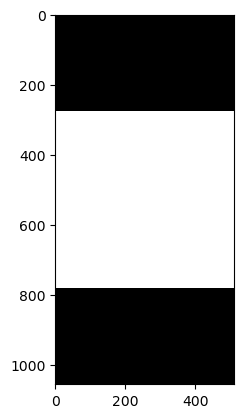

In [39]:
arr1 = np.load('/home/ashish/Ashish/UCAN/collages/npr925249119000/20181106/SUV_MIP.npy')
plt.imshow(arr1, cmap='gray')

In [15]:
# data2[data2['incorrect_projection'] == 'False'].to_excel("/home/ashish/Ashish/UCAN/dataset_for_training_regression_v2.xlsx")
data2[data2['incorrect_projection'] == 'False'].to_excel("/media/andres/T7 Shield1/UCAN_project/dataset_for_training_regression_v1.xlsx")